In [1]:
from os import listdir
from os.path import isfile, join
from nltk.tokenize import TweetTokenizer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cal_f1_score(path_pre, eps = 0.0001):

    ref_path = path_pre + '/reference/'
    reference_files = [f for f in listdir(ref_path) if isfile(join(ref_path, f))]
    dec_path = path_pre + '/decoded/'
    decoded_files = [f for f in listdir(dec_path) if isfile(join(dec_path, f))]

    reference_files.sort()
    decoded_files.sort()

    num_file = len(reference_files)
    precisions = np.zeros(num_file)
    recalls = np.zeros(num_file)

    tokenizer = TweetTokenizer()
    for i in range(num_file):
    #     if reference_files[i][:6] ==  decoded_files[i][:6]:
    #         print reference_files[i], decoded_files[i]
        f_ref = open(ref_path + reference_files[i], 'r').read()
        f_ref_token = set(tokenizer.tokenize(f_ref))
    #     print(reference_files[i] ,f_red.read())
        f_decode = open( dec_path + decoded_files[i], 'r').read()
        f_decode_token = set(tokenizer.tokenize(f_decode))
        precisions[i] = len(f_decode_token.intersection(f_ref_token)) * 1.0 / (len(f_decode_token) + eps)
        recalls[i] = len(f_decode_token.intersection(f_ref_token)) * 1.0 / (len(f_ref_token)+ eps)
        
    pre = np.mean(precisions)
    rec = np.mean(recalls)
    f1 = 2.0 / (1.0/pre + 1.0/rec)
    print('total ', i, ' number of samples')
    return [pre, rec, f1 ]
#         print reference_files[i]
#         print "ref:", f_ref
#         print decoded_files[i]
#         print "decode:", f_decode
#     print( decoded_files[i] , f_decode.read())
# f = open('example.txt', 'r')


In [4]:
# pretrained model
path_pre = './log/pretrained_model/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238410'

cal_f1_score(path_pre) # return: precision, recall, f1

('total ', 4458, ' number of samples')


[0.14248918894115392, 0.38500032992872757, 0.20799800864727042]

In [5]:
# our training
path_pre = './log/reddit_exp/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-39995_cov_init_cov_init'

cal_f1_score(path_pre)

('total ', 4458, ' number of samples')


[0.22693112952839692, 0.280542278653292, 0.2509048756007665]

In [6]:
# lead-3 baseline
path_pre = '../AskReddit_baseline_summarization'

cal_f1_score(path_pre)

('total ', 446413, ' number of samples')


[0.13421487565445456, 0.34257666185145413, 0.1928678697320262]

In [34]:
np.max(recalls)

1.0

In [35]:
np.mean(recalls)

0.38630394815427593

In [36]:
np.mean(precisions)

0.13801663019276983

In [7]:
i

517

In [28]:
i = 735
f_ref = open(ref_path + reference_files[i], 'r').read()
f_ref_token = set(tokenizer.tokenize(f_ref))
#     print(reference_files[i] ,f_red.read())
f_decode = open( dec_path + decoded_files[i], 'r').read()
f_decode_token = set(tokenizer.tokenize(f_decode))
# precisions[i] = len(f_decode_token.intersection(f_ref_token)) / len(f_decode_token)
# recalls[i] = len(f_decode_token.intersection(f_ref_token)) / len(f_ref_token)
print reference_files[i]
print "ref:", f_ref
print decoded_files[i]
print "decode:", f_decode

000735_reference.txt
ref: nothing .
000735_decoded.txt
decode: something ? seriously , i am now currently doing nothing it is because more then .
am not on the internet but in the end it would be more effort for the same result .
if i am said person asking said question in which whatever i was doing something that does not matter to you so by default in too becomes nothing .


In [31]:
f_decode_token.intersection(f_ref_token)

{u'.', u'nothing'}

## relationships small dataset

In [3]:
def add_example(eg_list, f_content, f_ref, f_decode, precision, recall):
    return eg_list + [{'content':f_content, 'reference': f_ref, 'decode': f_decode, 
                      'precision': precision, 'recall': recall}]

In [4]:
def print_and_cal(path_pre, max_output = 0, eps = 0.0001):
    cont_path = path_pre + '/content/'
    content_files = [f for f in listdir(cont_path) if isfile(join(cont_path, f))]
    ref_path = path_pre + '/reference/'
    reference_files = [f for f in listdir(ref_path) if isfile(join(ref_path, f))]
    dec_path = path_pre + '/decoded/'
    decoded_files = [f for f in listdir(dec_path) if isfile(join(dec_path, f))]

    content_files.sort()
    reference_files.sort()
    decoded_files.sort()
    
    if max_output:
        num_file = np.min([len(content_files), max_output])
    else:
        num_file = len(content_files)

    precisions = np.zeros(num_file)
    recalls = np.zeros(num_file)

    low_prec_low_recall = []
    low_prec_high_recall = []
    high_prec_low_recall = []
    high_prec_high_recall = []

    low_shreshold = 0.2
    high_shreshold = 0.5

    tokenizer = TweetTokenizer()
    for i in range(num_file):
    #     if reference_files[i][:6] ==  decoded_files[i][:6]:
    #         print reference_files[i], decoded_files[i]
        f_ref = open(ref_path + reference_files[i], 'r').read()
        f_content = open(cont_path + content_files[i], 'r').read()
        f_decode = open( dec_path + decoded_files[i], 'r').read()

        f_ref_token = set(tokenizer.tokenize(f_ref))
        f_content_token = set(tokenizer.tokenize(f_ref))
    #     print(reference_files[i] ,f_red.read())
        f_decode_token = set(tokenizer.tokenize(f_decode))
        precision = len(f_decode_token.intersection(f_ref_token)) * 1.0 / (len(f_decode_token) + eps)
        precisions[i] = precision
        recall = len(f_decode_token.intersection(f_ref_token)) * 1.0 / (len(f_ref_token)+ eps)
        recalls[i] = recall
        if precision <= low_shreshold and recall <= low_shreshold:
            low_prec_low_recall = add_example(low_prec_low_recall, f_content, f_ref, f_decode, precision, recall)
        elif  precision <= low_shreshold and recall > high_shreshold:
            low_prec_high_recall = add_example(low_prec_high_recall, f_content, f_ref, f_decode, precision, recall)
        elif precision > high_shreshold and recall <= low_shreshold:
            high_prec_low_recall = add_example(high_prec_low_recall, f_content, f_ref, f_decode, precision, recall)
        elif precision > high_shreshold and recall > high_shreshold:
            high_prec_high_recall = add_example(high_prec_high_recall, f_content, f_ref, f_decode, precision, recall)

        print('content: ', f_content)
        print('reference: ', f_ref)
        print('decoded:', f_decode)
        print('precision:', precisions[i], 'recall:', recalls[i])

    pre = np.mean(precisions)
    rec = np.mean(recalls)
    f1 = 2.0 / (1.0/pre + 1.0/rec)
    print('total ', i, ' number of samples')
    examples = {'low_prec_low_recall': low_prec_low_recall,
               'low_prec_high_recall': low_prec_high_recall,
               'high_prec_low_recall': high_prec_low_recall,
               'high_prec_high_recall': high_prec_high_recall}
    return [pre, rec, f1, examples]

In [5]:
path_pre = '/home/ubuntu/cs224u/pointer/log/fine_tune_relationships_exp/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-246304_cov_init'

[pre, rec, f1, examples] = print_and_cal(path_pre, max_output = 200)

('content: ', "my boyfriend of 8 months recently broke up with me because he felt like we were n't close . citing that he could never read my emotions or understanding how i felt due to a lack of social cues . being intimate and feeling close to someone is a strong biological need . i have a strong fear of intimacy and showing my affection or feelings to other . i am scared of rejection lack the social skills to interpret situations and scared of interpreting people feels wrong . i have never worked well with others and do n't have many friends for this very reason . reflecting back i on our relationship i can see countless situations where i had the opportunity to initiate intimacy but did n't . i wish i had acted on those opportunities and it makes me feel extremely worthless . i let my personality destroy my relationship . i 've never had any problems with physical intimacy sex but outside the bedroom i never took risks . holding hands putting my arm around him going in for a kiss i

In [6]:
for key, value in examples.items():
    print(key, len(value))
examples

('low_prec_high_recall', 0)
('low_prec_low_recall', 16)
('high_prec_high_recall', 0)
('high_prec_low_recall', 20)


{'high_prec_high_recall': [],
 'high_prec_low_recall': [{'content': "i met a girl over tinder last month . we are both recent college grads living at home with our parents . we 've gone on normal dates , mostly just getting drinks and then taking a walk and making out every 1-2 weeks . last night was our 5th date and we had sex . i do not know what she wants . and she does not know what i want . we have n't communicated about it . i merely want to date casually and not exclusively for now and definitely not a relationship . it has nothing to do with her , just with where i 'm at in life . the thing i 'm nervous about is if she wants something more and i do not . there are signs that she has romantic feelings for me . i feel bad for having sex with her when we have n't communicated what we wanted yet . i do n't want to hurt her . i 'm fine with what we 're doing so far very casually . i like to be with her , but i do n't want anything serious . i am very new to casual dating and dating 

In [38]:
[pre, rec, f1 ]

[0.31974029778215757, 0.40476269263471176, 0.35726269066098604]

(array([ 3., 15., 15., 18., 10.,  4.,  2.,  2.,  4.,  6.]),
 array([0.        , 0.0806449 , 0.1612898 , 0.2419347 , 0.3225796 ,
        0.40322451, 0.48386941, 0.56451431, 0.64515921, 0.72580411,
        0.80644901]),
 <a list of 10 Patch objects>)

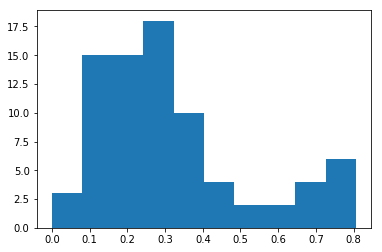

In [15]:
plt.hist(precisions)

(array([ 1.,  6., 25., 19.,  8.,  5.,  5.,  1.,  3.,  6.]),
 array([0.        , 0.09999923, 0.19999846, 0.29999769, 0.39999692,
        0.49999615, 0.59999538, 0.69999462, 0.79999385, 0.89999308,
        0.99999231]),
 <a list of 10 Patch objects>)

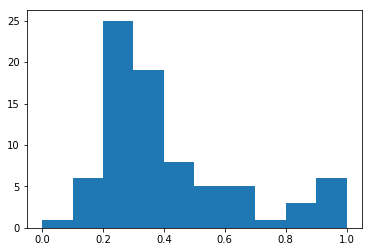

In [16]:
plt.hist(recalls)